# 1. Bike Details Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
# 1. What is the range of selling prices in the dataset?
# 2. What is the median selling price for bikes in the dataset?
# 3. What is the most common seller type?
# 4. How many bikes have driven more than 50,000 kilometers?
# 5. What is the average km_driven value for each ownership type?
# 6. What proportion of bikes are from the year 2015 or older?
# 7. What is the trend of missing values across the dataset?
# 8. What is the highest ex_showroom_price recorded, and for which bike?
# 9. What is the total number of bikes listed by each seller type?
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
# 11. Identify and remove outliers in the km_driven column using the IQR method.
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
# year)?
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
# 1. What is the range of selling prices in the dataset?

df["selling_price"].max() - df["selling_price"].min()

755000

In [ ]:
# 2. What is the median selling price for bikes in the dataset?

df["selling_price"].median()

45000.0

In [ ]:
# 3. What is the most common seller type?

df["seller_type"].value_counts()  # As below Individual type is the most common seller type

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
# 4. How many bikes have driven more than 50,000 kilometers?

# df["km_driven"].value_counts()

count = []
for i in df["km_driven"]:
  if i > 50000:
    count.append(i)
print("Total bikes driven more than 50,000 KM = ", len(count))

Total bikes driven more than 50,000 KM =  170


In [ ]:
# 5. What is the average km_driven value for each ownership type?

df.groupby("owner")["km_driven"].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
# 6. What proportion of bikes are from the year 2015 or older?

count = []
for i in df["year"]:
  if i <= 2015:
    count.append(i)
print("Proportion of bikes from year 2015 or older = ", len(count)/len(df["year"]))

Proportion of bikes from year 2015 or older =  0.5664467483506126


In [ ]:
# 7. What is the trend of missing values across the dataset?

df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?

df[df["ex_showroom_price"] == df["ex_showroom_price"].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [ ]:
# 9. What is the total number of bikes listed by each seller type?

df.groupby("seller_type")["name"].count()

,name
seller_type,
Dealer,6
Individual,1055


In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?

df.groupby('owner').agg({'selling_price': 'sum', 'km_driven': 'mean'})

,selling_price,km_driven
owner,,
1st owner,55461080,32816.583333
2nd owner,6846999,39288.991870
3rd owner,613000,33292.181818
4th owner,355000,311500.000000


In [ ]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.

print("Before removing outliers =", df.shape)
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q1 + 1.5*IQR

upper_array = np.where(df['km_driven'] >= upper)[0]
lower_array = np.where(df['km_driven'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("After removing outliers =", df.shape)


Before removing outliers = (1061, 7)
After removing outliers = (927, 7)


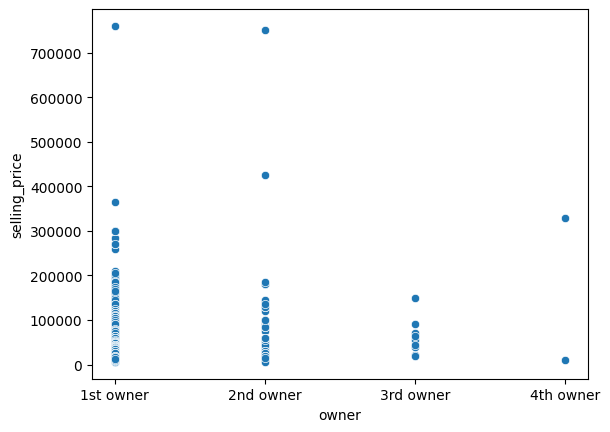

In [ ]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

sns.scatterplot(x=df["owner"], y=df["selling_price"])
plt.show()

In [ ]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

df["age"] = 2025 - df["year"]
average_depreciation = df.groupby("age")["selling_price"].mean()
average_depreciation

,selling_price
age,
5,183333.333333
6,119689.511628
7,87988.441860
8,79697.674419
9,58496.818182
10,56649.484536
11,50464.935065
12,53359.375000
13,37292.839286


In [ ]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?

df["average_price"] = df.groupby("year")["selling_price"].transform("mean")
df[df["selling_price"] > df["average_price"]]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,average_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6,119689.511628
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,87988.441860
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,56649.484536
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,41417.647059
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,6,119689.511628
...,...,...,...,...,...,...,...,...,...
1000,Honda CBR 150,60000,2015,Individual,1st owner,32000,120000.0,10,56649.484536
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,9,58496.818182
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,11,50464.935065
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,13,37292.839286


In [ ]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

df["ex_showroom_price"].fillna(0, inplace = True)
df["ex_showroom_price"] = df["ex_showroom_price"].astype(int)

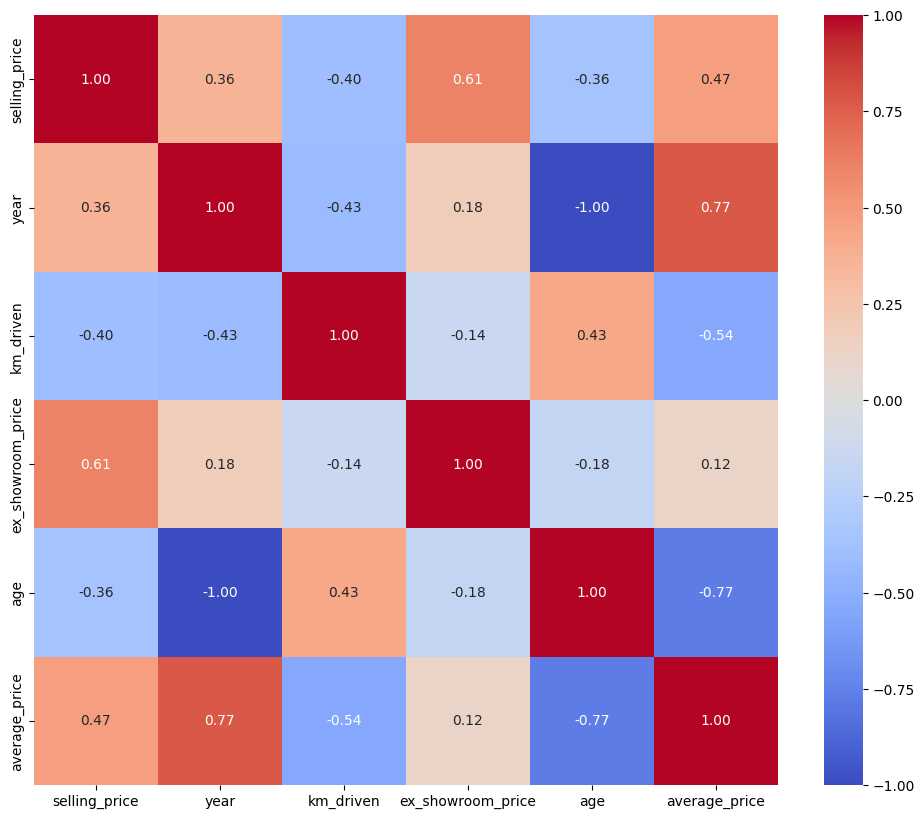

In [ ]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.show()

# 2. Car Sale Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
# 4. What is the distribution of car prices across different regions?
# 5. What is the distribution of cars based on body styles?
# 6. How does the average selling price of cars vary by customer gender and annual income?
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
# 8. How does the average car price differ between cars with different engine sizes?
# 9. How do car prices vary based on the customer's annual income bracket?
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
# 12. Is there any seasonal trend in car sales based on the date of sale?
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
# 15. How does the average car price vary across different car models and engine types?

In [ ]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

df.groupby("Dealer_Name")["Price ($)"].mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [ ]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

#Variation Calculation
df.groupby("Company")["Price ($)"].var().sort_values(ascending = False)

,Price ($)
Company,
Lincoln,3.864389e+08
Saab,3.862695e+08
Cadillac,3.809180e+08
Plymouth,3.635123e+08
Lexus,3.187269e+08
Buick,2.938561e+08
Mercury,2.704437e+08
Nissan,2.629024e+08
Saturn,2.556873e+08


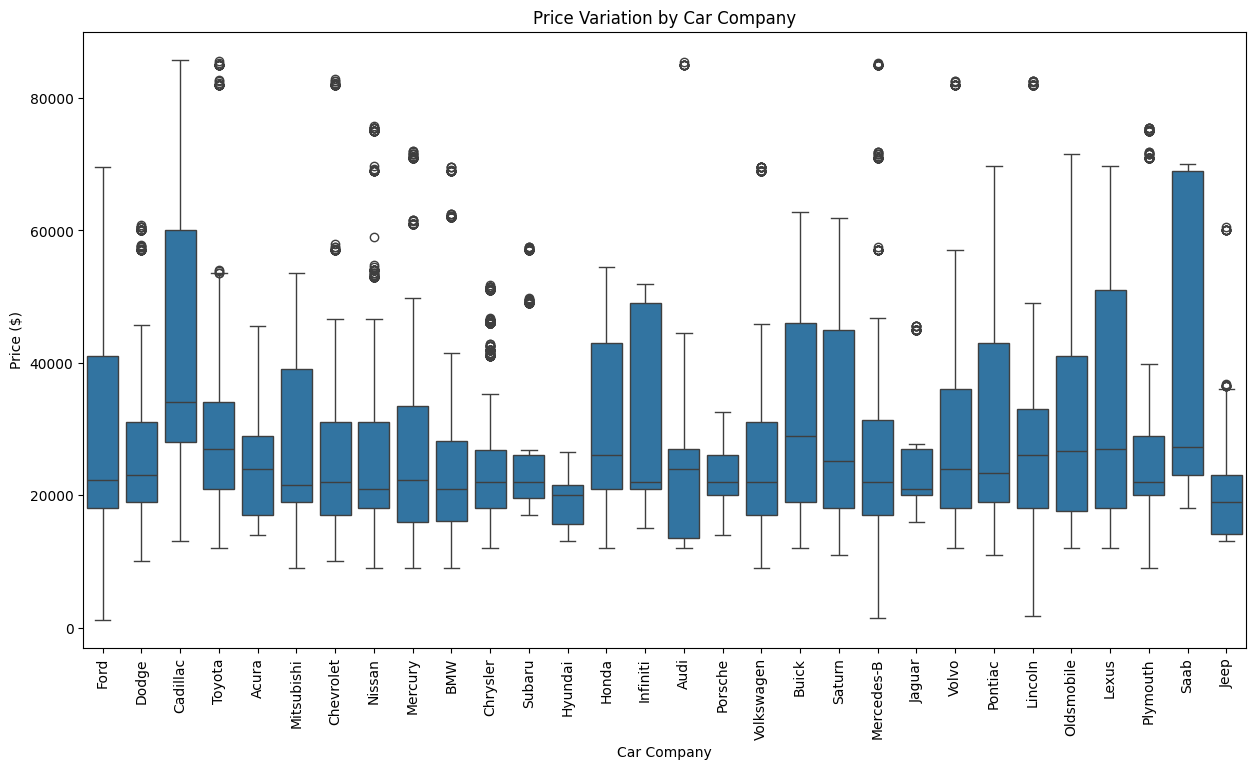

In [ ]:
#VAriation visualisation

plt.figure(figsize=(15, 8))
sns.boxplot(x='Company', y='Price ($)', data=df)
plt.xticks(rotation=90)
plt.title('Price Variation by Car Company')
plt.xlabel('Car Company')
plt.ylabel('Price ($)')
plt.show()

In [ ]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

df.groupby("Transmission")["Price ($)"].describe()

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [ ]:
# 4. What is the distribution of car prices across different regions?

df.groupby("Dealer_Region")["Price ($)"].describe()

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [ ]:
# 5. What is the distribution of cars based on body styles?

df.groupby("Body Style")["Company"].describe()

,count,unique,top,freq
Body Style,,,,
Hardtop,2971,23,Chevrolet,406
Hatchback,6128,29,Mitsubishi,470
Passenger,3945,24,Chevrolet,420
SUV,6374,27,Dodge,633
Sedan,4488,23,Oldsmobile,605


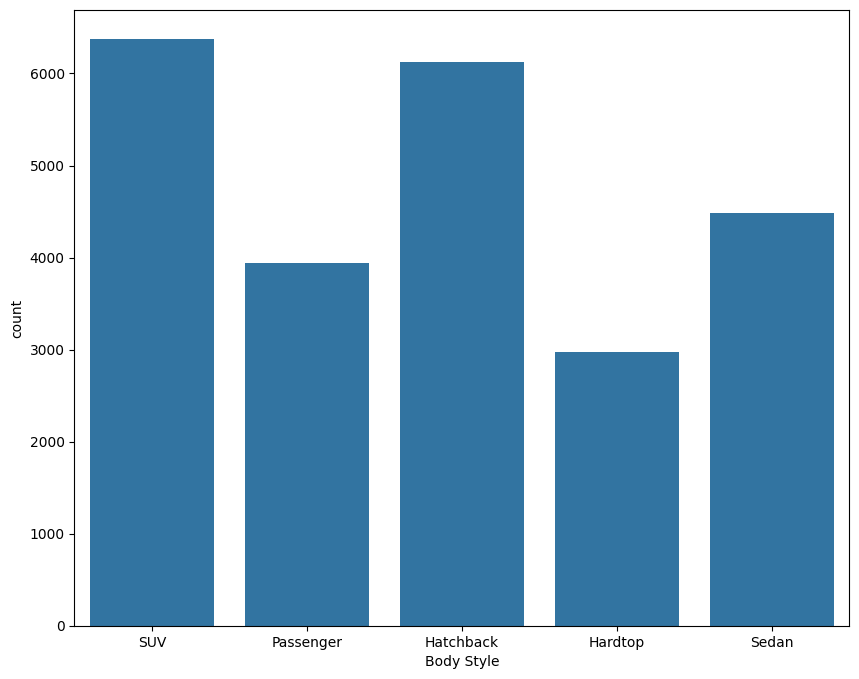

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Body Style', data=df)
plt.show()

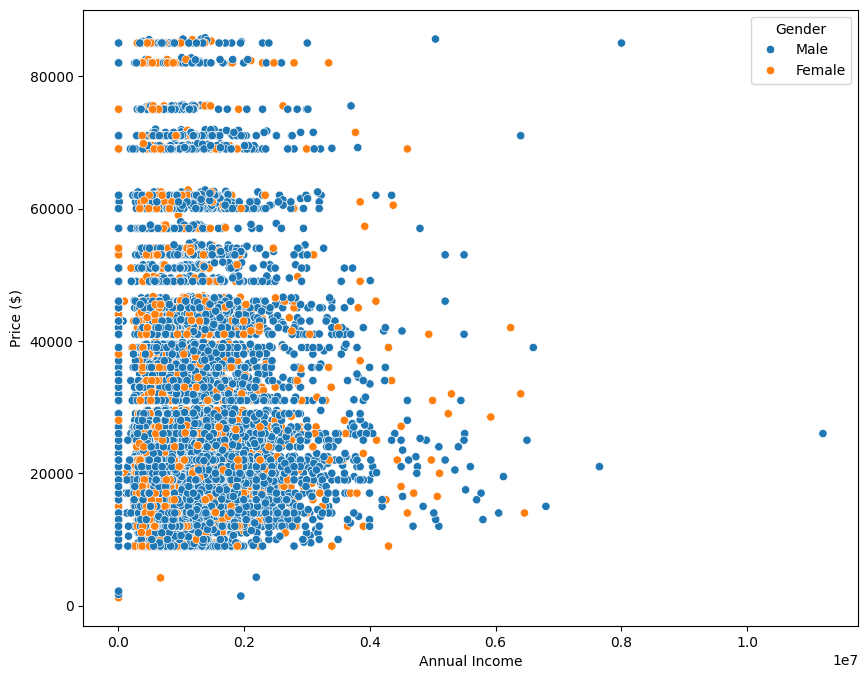

In [ ]:
# 6. How does the average selling price of cars vary by customer gender and annual income?

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=df)
plt.show()

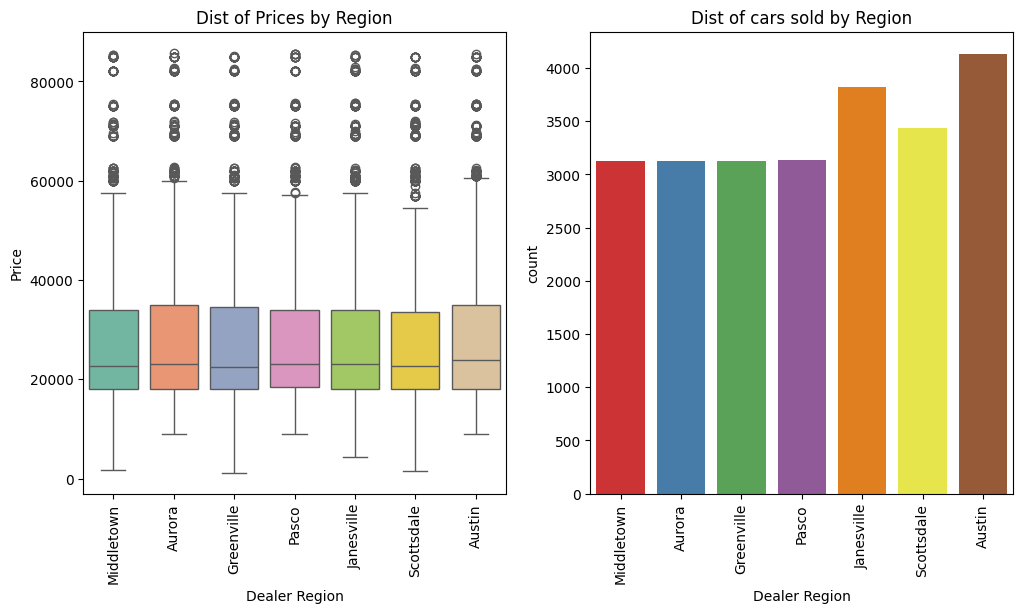

In [ ]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)', data=df, palette = 'Set2')
plt.xlabel('Dealer Region')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.title('Dist of Prices by Region')


plt.subplot(1, 2, 2)
sns.countplot(x = 'Dealer_Region', data=df, palette = 'Set1')
plt.xlabel('Dealer Region')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.title('Dist of cars sold by Region')

plt.show()

In [ ]:
# 8. How does the average car price differ between cars with different engine sizes?

df.groupby("Engine")["Price ($)"].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [ ]:
# 9. How do car prices vary based on the customer's annual income bracket?

df.groupby("Annual Income")["Price ($)"].mean()

,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


In [ ]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

df.groupby("Model")["Price ($)"].count().sort_values(ascending = False).head()

,Price ($)
Model,
Diamante,418
Prizm,411
Silhouette,411
Passat,391
Ram Pickup,383


In [ ]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

df.groupby("Color")["Price ($)"].var().sort_values(ascending = False)

,Price ($)
Color,
Red,2.408506e+08
Black,2.336638e+08
Pale White,1.981717e+08


In [ ]:
# 12. Is there any seasonal trend in car sales based on the date of sale?

df.groupby("Date")["Price ($)"].count().head(10)

,Price ($)
Date,
1/10/2022,5
1/10/2023,15
1/11/2023,20
1/12/2022,30
1/13/2022,20
1/14/2023,10
1/15/2023,40
1/16/2023,10
1/17/2022,20


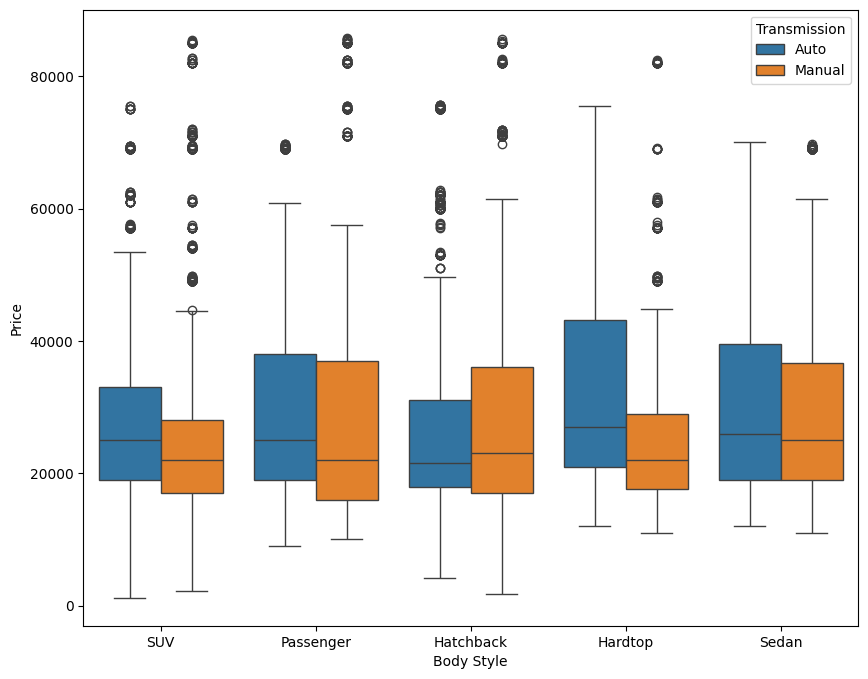

In [ ]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?

plt.figure(figsize = (10,8))
sns.boxplot(x = 'Body Style', y = 'Price ($)', hue = 'Transmission', data = df)
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.show()

In [ ]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

df['Engine'] = df['Engine'].str.replace('DoubleÂ\xa0Overhead Camshaft', '0')
df['Engine'] = df['Engine'].str.replace('Overhead Camshaft', '1')

In [ ]:
df['Engine'].unique()

array(['0', '1'], dtype=object)

In [ ]:
df['Engine'] = df['Engine'].astype(int)

In [ ]:
df['Engine'].unique()

array([0, 1])

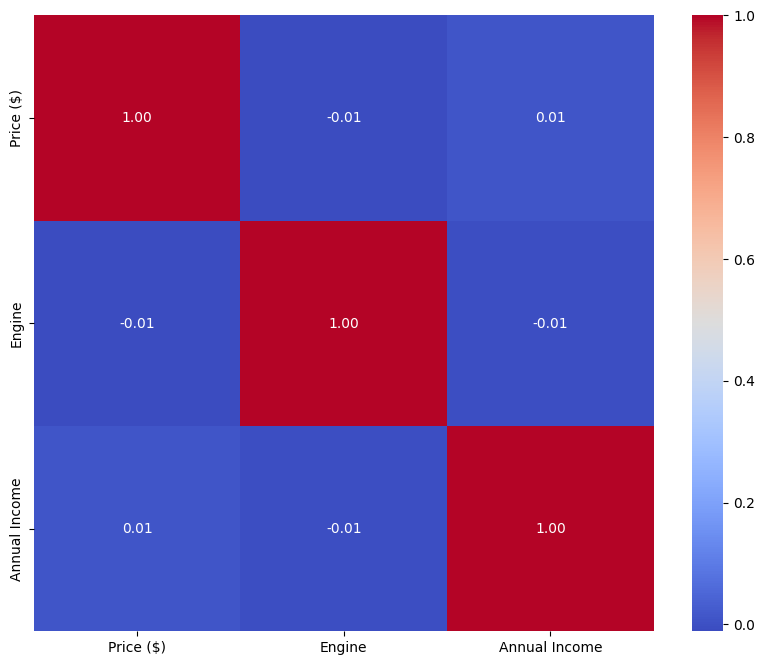

In [ ]:
cols = ['Price ($)', 'Engine', 'Annual Income']
corr = df[cols].corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.show()

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

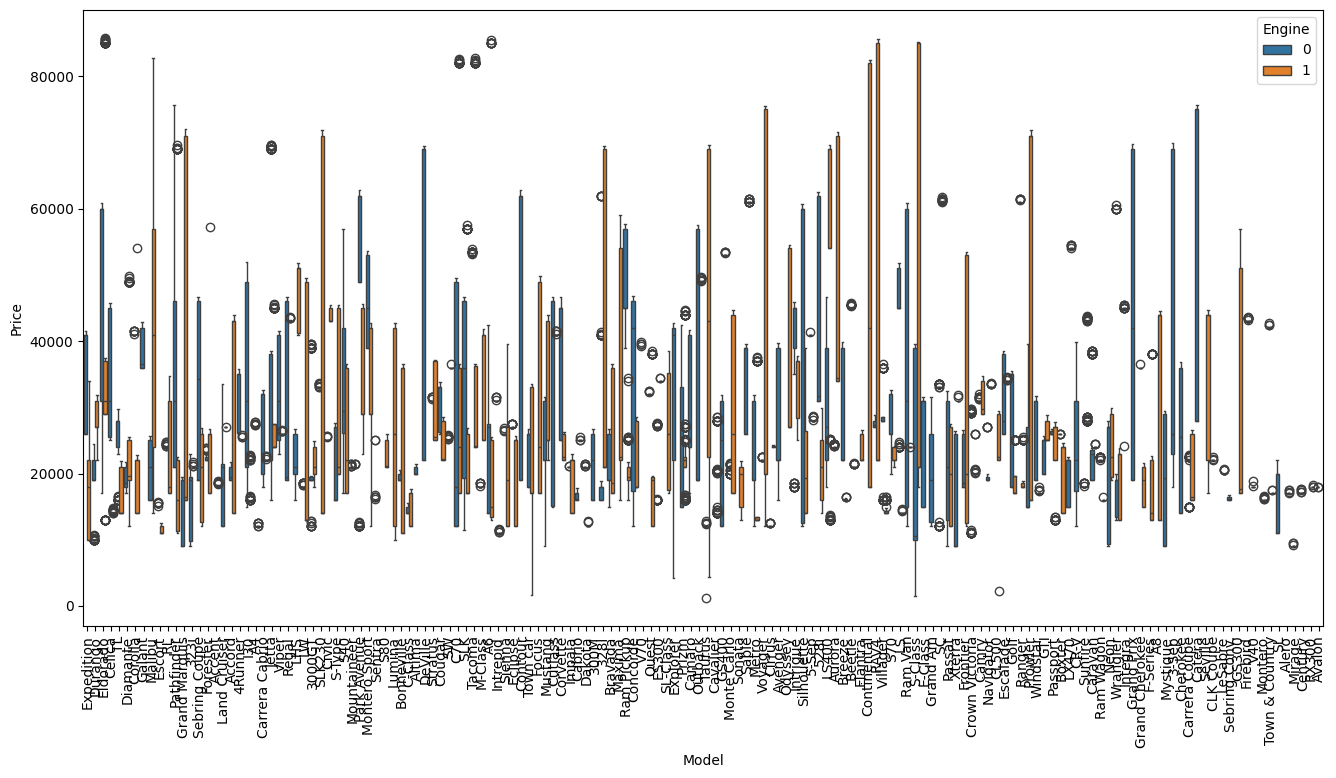

In [ ]:
# 15. How does the average car price vary across different car models and engine types?

plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Model', y = 'Price ($)', hue = 'Engine', data = df)
plt.xlabel('Model')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.groupby('Model').agg({'Engine': 'sum', 'Price ($)': 'mean'})

,Engine,Price ($)
Model,,
3-Sep,0,37986.380117
3000GT,147,22282.250825
300M,0,21394.888889
323i,37,17355.634615
328i,79,27821.359223
...,...,...
Viper,48,30905.258333
Voyager,143,31491.110497
Windstar,22,23682.842975


# 3. Amazon sales

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


### Data Cleaning

In [ ]:
# Data Cleaning: Inspect the data for missing values, duplicates, and incorrect data types, and handle them appropriately.
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [ ]:
df["discounted_price"] = df["discounted_price"].str.replace('₹', '').str.replace(',', '')
df["actual_price"] = df["actual_price"].str.replace('₹', '').str.replace(',', '')
df["discount_percentage"] = df["discount_percentage"].str.replace('%', '')
df["rating"] = df["rating"].str.replace('|', '0')
df["rating_count"] = df["rating_count"].str.replace(',', '')

In [ ]:
df["rating_count"].unique()

array(['24269', '43994', '7928', ..., '468', '8031', '6987'], dtype=object)

In [ ]:
df["discounted_price"] = df["discounted_price"].astype(float)
df["actual_price"] = df["actual_price"].astype(float)
df["discount_percentage"] = df["discount_percentage"].astype(int)
df["rating"] = df["rating"].astype(float)
df["rating_count"] = df["rating_count"].astype(int)

In [ ]:
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,int64
rating,float64
rating_count,int64
about_product,object
user_id,object


### Analysing data

In [ ]:
# 1. What is the average rating for each product category?
# 2. What are the top rating_count products by category?
# 3. What is the distribution of discounted prices vs. actual prices?
# 4. How does the average discount percentage vary across categories?
# 5. What are the most popular product names?
# 6. What are the most popular product keywords?
# 7. What are the most popular product reviews?
# 8. What is the correlation between discounted _ price and rating?
# 9. What are the Top 5 categories based on the highest ratings?
# 10. Identity any potential areas for improvement or optimization based on the data analysis.

In [ ]:
# 1. What is the average rating for each product category?

df.groupby("category")["rating"].mean()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


,rating_count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,231
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24
"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24


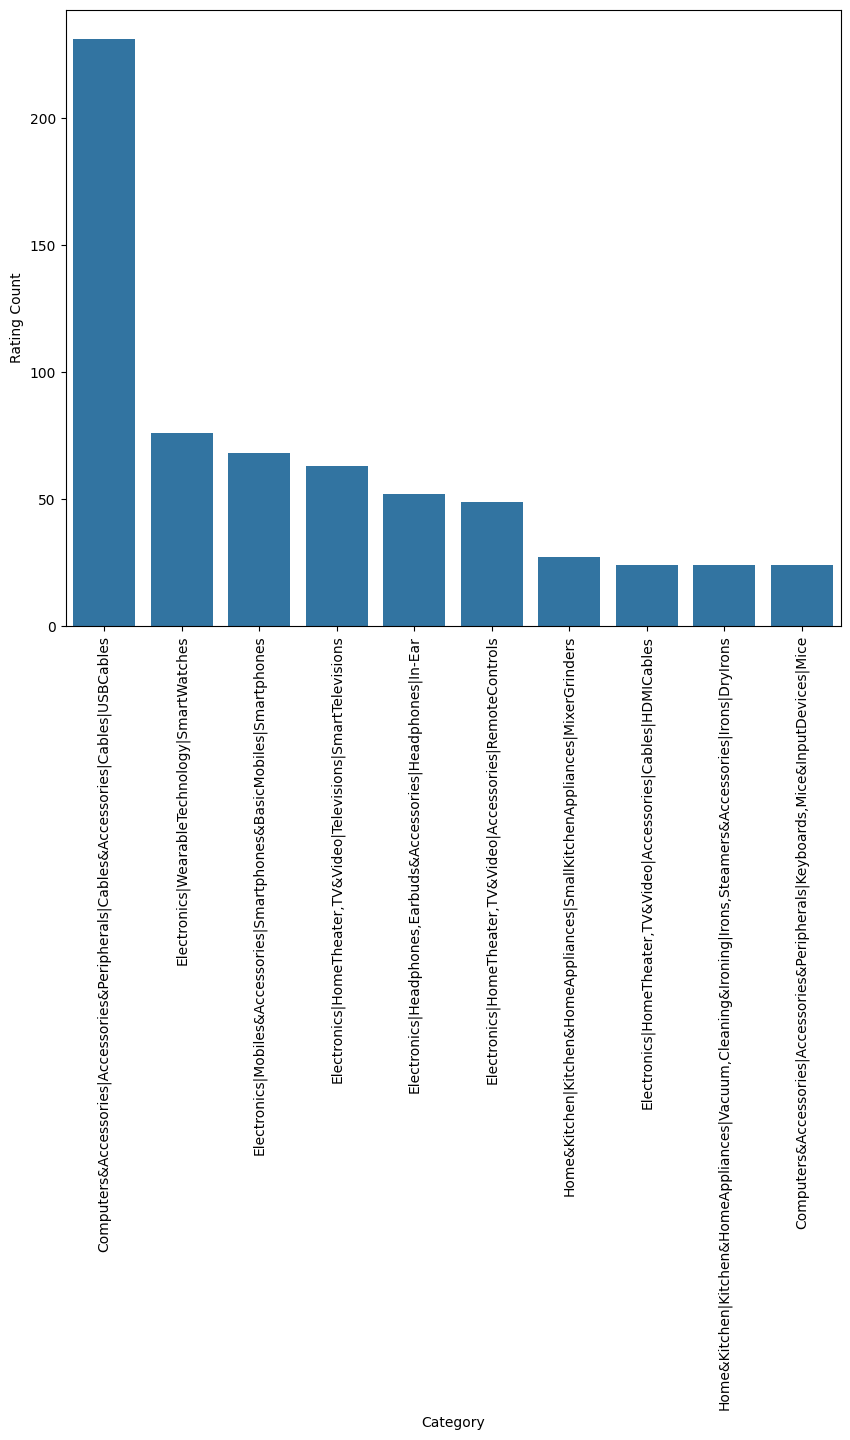

In [ ]:
# 2. What are the top rating_count products by category?

filtered = df.groupby("category")["rating_count"].count().sort_values(ascending = False).head(10)
filtered = pd.DataFrame(filtered)

# option 1
display(filtered)

print("\n")

# option 2
plt.figure(figsize = (10, 8))
sns.barplot(x = 'category', y = 'rating_count', data = filtered)
plt.xlabel('Category')
plt.ylabel('Rating Count')
plt.xticks(rotation = 90)
plt.show()

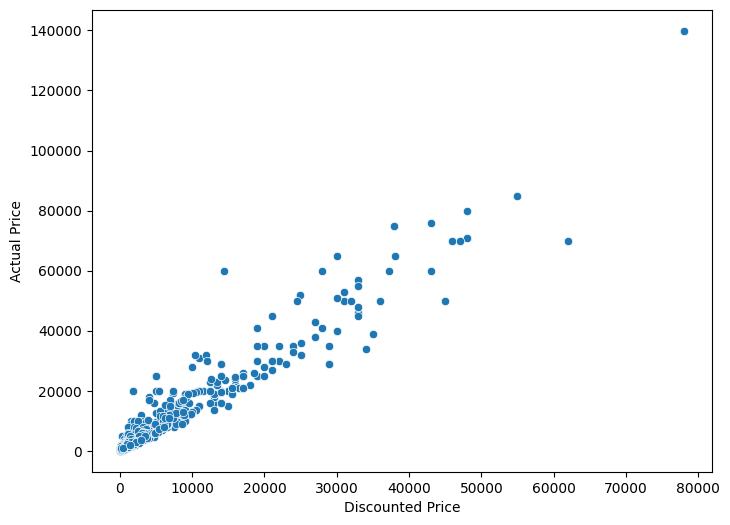

In [ ]:
# 3. What is the distribution of discounted prices vs. actual prices?

plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'discounted_price', y = 'actual_price', data = df)
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.show()

In [ ]:
# 4. How does the average discount percentage vary across categories?

df.groupby("category")["discount_percentage"].mean().round(2).head(20)

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42.00
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35.00
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,56.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,46.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams,44.50
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,90.00
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables,55.00
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables,54.00


In [ ]:
# 5. What are the most popular product names?

df.groupby("product_name")["rating_count"].count().sort_values(ascending = False).head(10)

,rating_count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
"Ambrane 60W / 3A Fast Charging Output Cable with Type-C to USB for Mobile, Neckband, True Wireless Earphone Charging, 480mbps Data Sync Speed, 1m Length (ACT - AZ10, Black)",3
"Fire-Boltt Visionary 1.78"" AMOLED Bluetooth Calling Smartwatch with 368*448 Pixel Resolution 100+ Sports Mode, TWS Connection, Voice Assistance, SPO2 & Heart Rate Monitoring",3
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",3
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3


In [ ]:
# 6. What are the most popular product keywords?



In [ ]:
# 7. What are the most popular product reviews?

# df.groupby("review_title")["rating"].count().sort_values(ascending = False).head(10)

df["review_title"].value_counts().head(10)

,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",10
"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good",8
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"Fake Product,Costly but excellent quality,Storage good but don't know how to Activate warantee??,Good for use,5 stas nahi diya kyuki capacity 477gb hi rahta hai,Speed not as advertise,Good one,It's ok",6
"Above average phone,Worth For The Money 💰,Okie,Phone is excellent,Purchased in good budget at 12k,It can fulfill basic needs in affordable price range,Nice,About features",6
"It is the best tv if you are getting it in 10-12k,Good price but the OS lags,GARBAGE QUALITY,Good product.,Good quality,Great experience everything is fantastic 🤠,Super picture quality and sound quality,Awesome",5
"GOOD,Thank you Amazon very good charging cable,Good,Very good product,good quality,Very Good Product,This is fast charging USB!,Simply perfect at the price of below 100",5


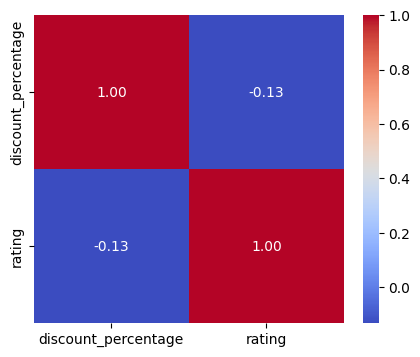

In [ ]:
# 8. What is the correlation between discounted _ price and rating?

cols = ["discount_percentage", "rating"]
corr = df[cols].corr()

plt.figure(figsize = (5, 4))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.show()

,rating
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,5.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",5.0
"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers,4.8


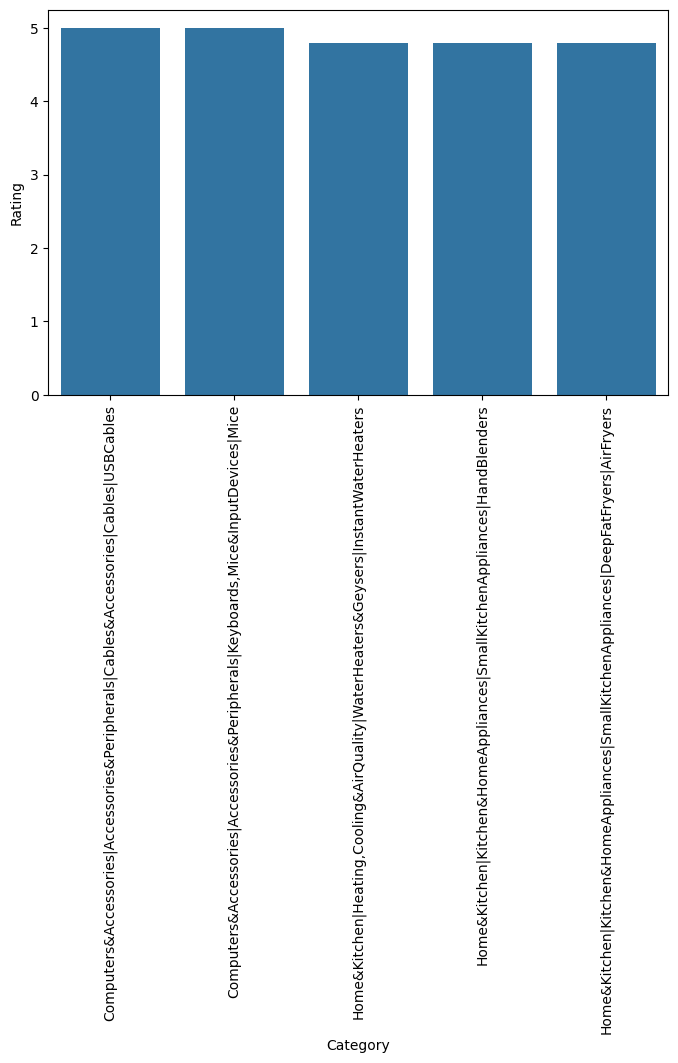

In [ ]:
# 9. What are the Top 5 categories based on the highest ratings?

filtered = df.groupby("category")["rating"].max().sort_values(ascending = False).head(5)
filtered = pd.DataFrame(filtered)

# option 1
display(filtered)

print("\n")

# option 2
plt.figure(figsize = (8, 5))
sns.barplot(x = 'category', y = 'rating', data = filtered)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# 10. Identity any potential areas for improvement or optimization based on the data analysis.

# 1) The heatmap showed a very low correlation between discount_percentage and rating.
# This suggests that simply offering a higher discount does not necessarily translate to a higher product rating.

# 4. Spotify Dataset

In [45]:
# Questions:

# 1. Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful.
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('spotify.csv')
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [48]:
df.shape

(440, 5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [50]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [51]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [52]:
df.nunique()

,0
Artist,115
Track Name,412
Popularity,51
Duration (ms),410
Track ID,413


In [54]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful.

display(df.isnull().sum())

display(df.duplicated().sum())

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


np.int64(27)

In [55]:
df.drop_duplicates(keep ='first', inplace = True)
display(df.duplicated().sum())

np.int64(0)

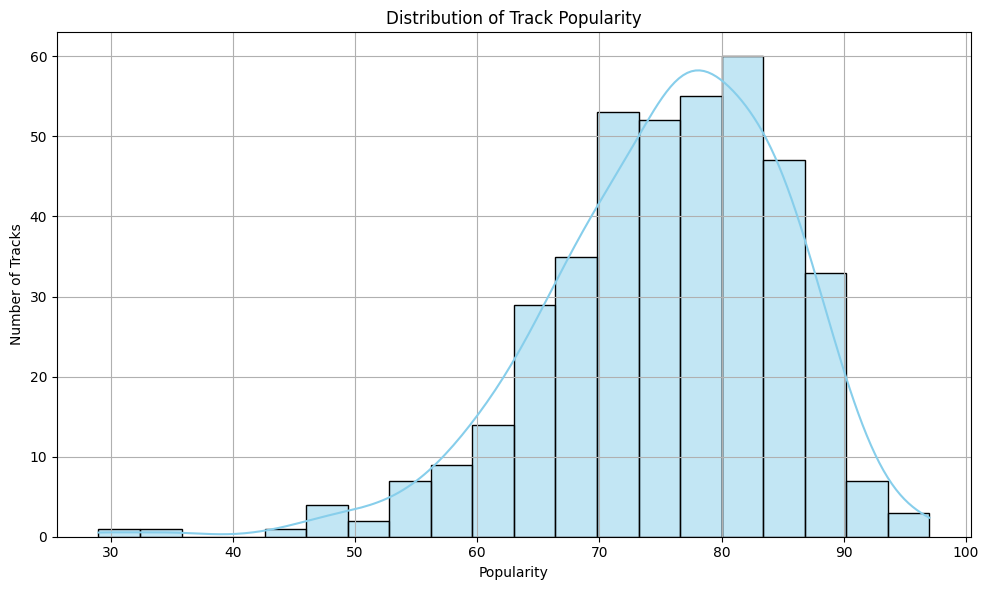

In [56]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

plt.figure(figsize=(10, 6))
sns.histplot(df["Popularity"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.tight_layout()
plt.show()

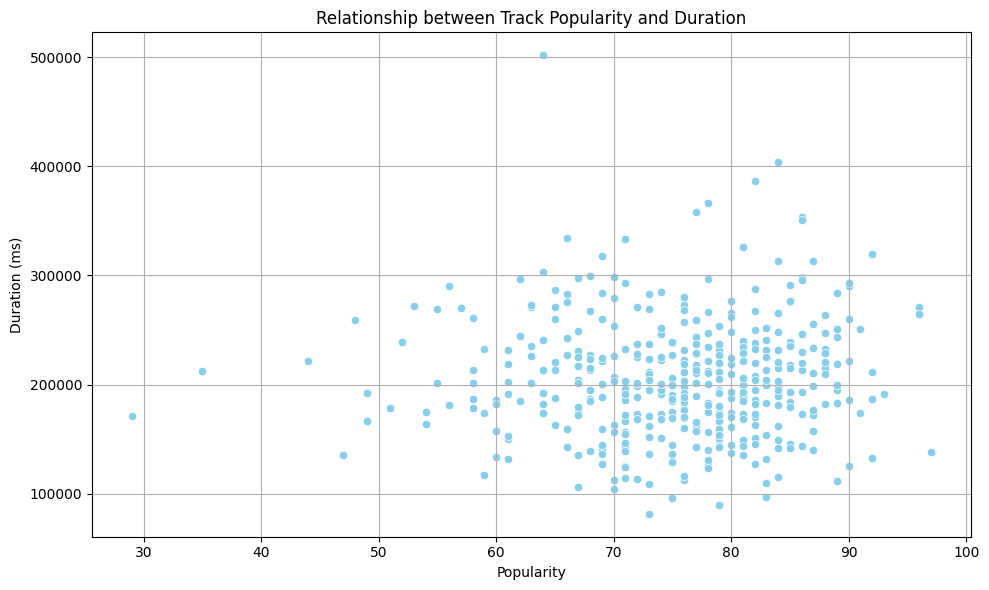

In [57]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Popularity', y = 'Duration (ms)', data = df, color = 'skyblue')
plt.title("Relationship between Track Popularity and Duration")
plt.xlabel("Popularity")
plt.ylabel("Duration (ms)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
df["Artist"].value_counts().head(10).index

Index(['Drake', 'Eminem', 'Lil Nas X', 'JAY-Z', '21 Savage', 'Flo Rida', '¥$',
       'Timbaland', 'Ludacris', 'Travis Scott'],
      dtype='object', name='Artist')

Index(['Drake', 'Eminem', 'Lil Nas X', 'JAY-Z', '21 Savage', 'Flo Rida', '¥$',
       'Timbaland', 'Ludacris', 'Travis Scott'],
      dtype='object', name='Artist')

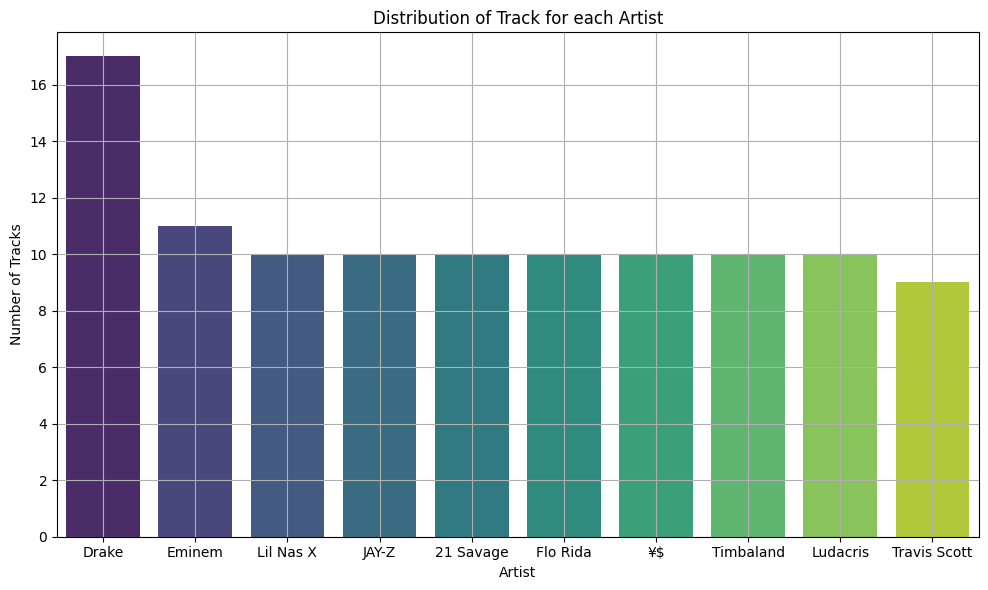

In [59]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

top_10 = df["Artist"].value_counts().head(10).index #index = This extracts the artist names (the index of the resulting Series) into a list called top_10.
filtered1 = df[df["Artist"].isin(top_10)]

# option 1
display(top_10)

print("\n")

plt.figure(figsize=(10, 6))
sns.countplot(data = filtered1, x ="Artist", order = top_10, palette="viridis")
plt.title("Distribution of Track for each Artist")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

df.sort_values(by = "Popularity", ascending = True)[["Artist", "Track Name", "Popularity"]].head(5)

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


,Popularity
Artist,
21 Savage,83.800000
Eminem,83.636364
Drake,82.882353
JAY-Z,77.900000
Lil Nas X,75.900000


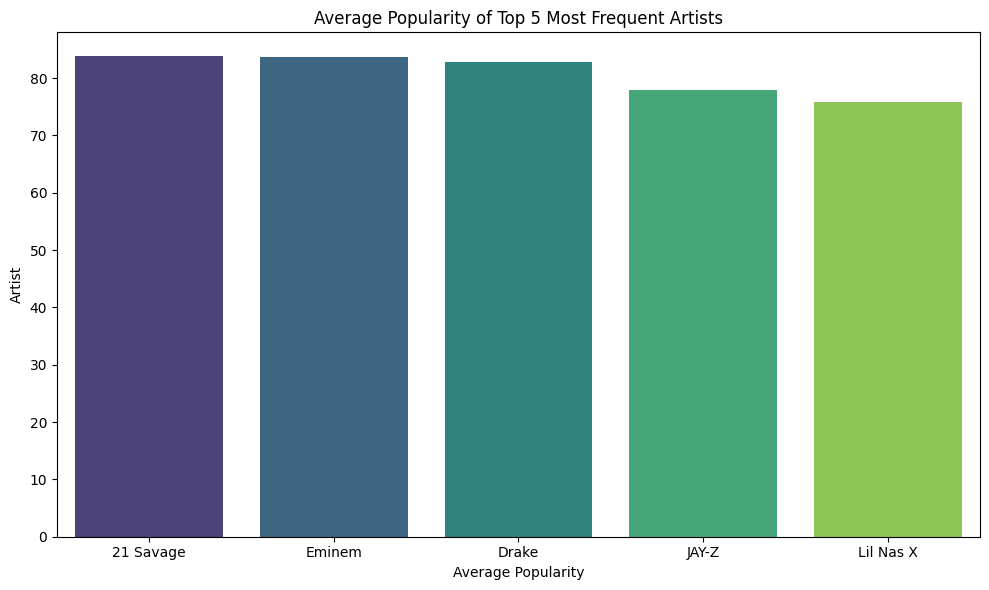

In [61]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_5 = df["Artist"].value_counts().head(5).index
filtered2 = df[df["Artist"].isin(top_5)]

new = filtered2.groupby("Artist")["Popularity"].mean().sort_values(ascending = False)
new = pd.DataFrame(new)

display(new)

plt.figure(figsize=(10, 6))
sns.barplot(data = new, x='Artist', y='Popularity', palette="viridis")
plt.title("Average Popularity of Top 5 Most Frequent Artists")
plt.xlabel("Average Popularity")
plt.ylabel("Artist")
# plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [63]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

df.groupby(["Artist", "Track Name"])["Popularity"].count().sort_values(ascending = False).head(5)

Artist               Track Name                                                                                                
Noah Kahan           Dial Drunk (with Post Malone)                                                                                 2
2 Chainz             We Own It (Fast & Furious)                                                                                    1
Metro Boomin         Calling (Spider-Man: Across the Spider-Verse) (Metro Boomin & Swae Lee, NAV, feat. A Boogie Wit da Hoodie)    1
                     Annihilate (Spider-Man: Across the Spider-Verse) (Metro Boomin & Swae Lee, Lil Wayne, Offset)                 1
Megan Thee Stallion  Thot Shit                                                                                                     1
Name: Popularity, dtype: int64

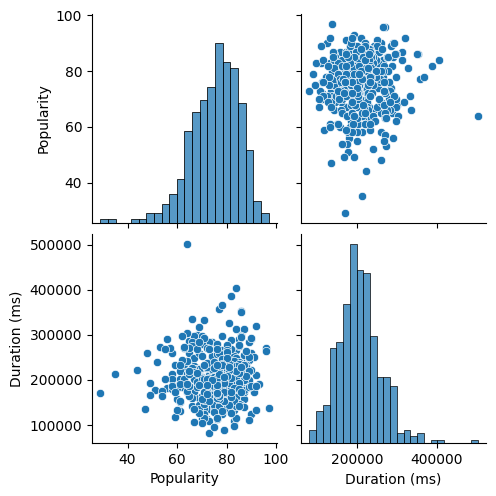

In [65]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df, palette = 'husl')

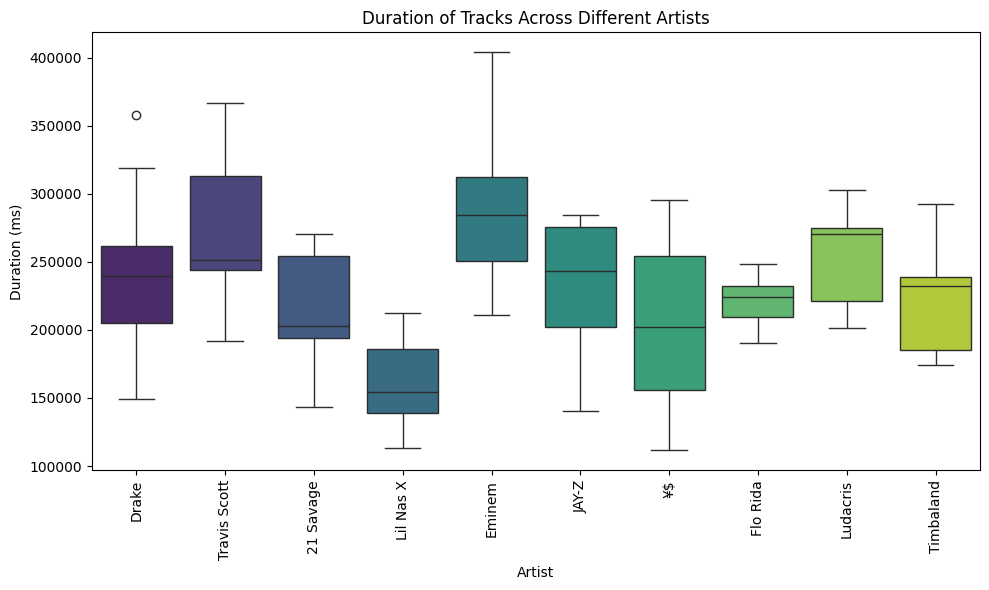

In [73]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

#Boxplot

top_5 = df["Artist"].value_counts().head(10).index
filtered2 = df[df["Artist"].isin(top_5)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=filtered2, palette="viridis")
plt.title("Duration of Tracks Across Different Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

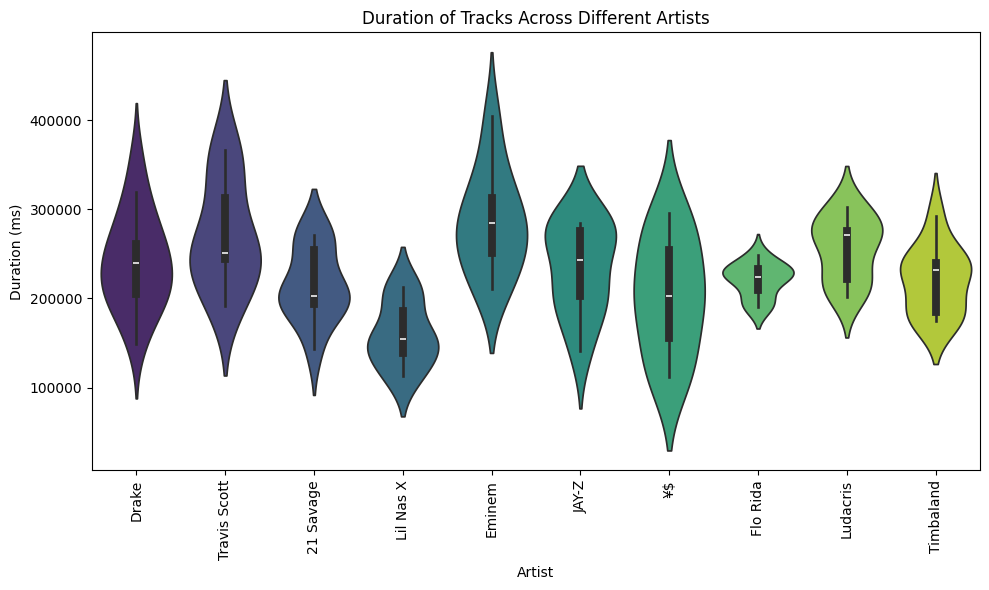

In [74]:
#violin plot

top_5 = df["Artist"].value_counts().head(10).index
filtered2 = df[df["Artist"].isin(top_5)]

plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=filtered2, palette="viridis")
plt.title("Duration of Tracks Across Different Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

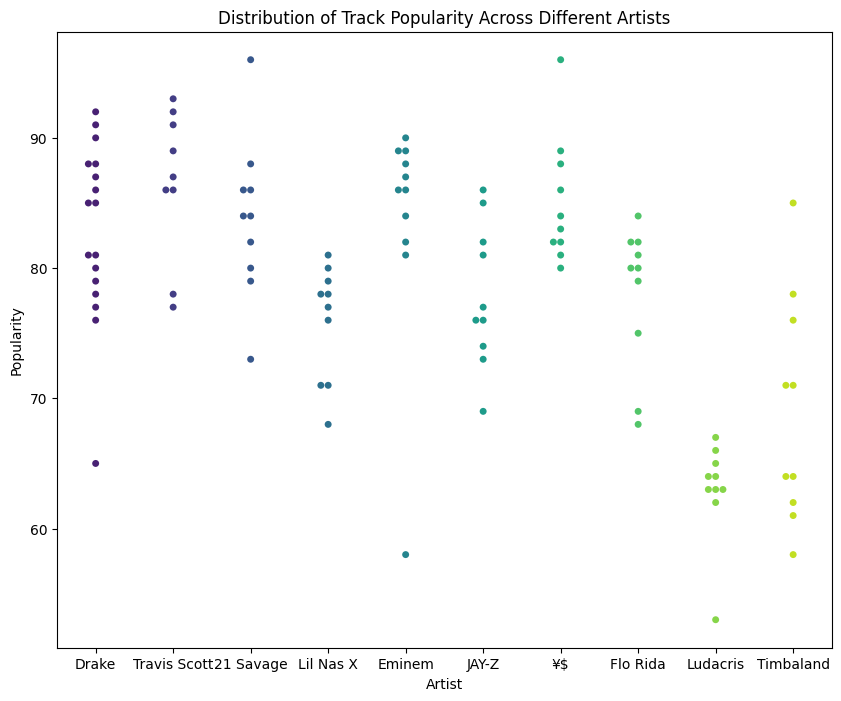

In [76]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

top_5 = df["Artist"].value_counts().head(10).index
filtered2 = df[df["Artist"].isin(top_5)]

plt.figure(figsize = (10,8))
sns.swarmplot(x = 'Artist', y = 'Popularity', data = filtered2, palette = 'viridis')
plt.title("Distribution of Track Popularity Across Different Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.show()